# Analyzing employment outcomes using pandas
## Introduction
The goal of this project is to explore the relationships between college major and employment outcomes, such as salary, unemployment rate, etc. These relationships are best identified using visualization. The date used can be found [here](https://github.com/fivethirtyeight/data/tree/master/college-majors).

The author is an Aerospace Engineering major and is quite interested in seeing how he measures up!
## Reading and Exploring the Data

In [69]:
import pandas as pd
recent_grads = pd.read_csv('recent-grads.csv')
print(recent_grads.info())
recent_grads.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


## Dealing with missing values
Very few rows contain missing values, let's just get rid of them - it shouldn't affect the observations significantly.

In [6]:
raw_data_count = recent_grads.shape[0]
recent_grads = recent_grads.dropna()
cleaned_data_count = recent_grads.shape[0]
print(raw_data_count, cleaned_data_count)

173 172


## Visualizing earnings vs major popularity
Let's first explore how median earnings are related to a major popularity, which for the purposes of our data, can be obtained from the sample size of each major.

Text(0.5, 1.0, 'Median Income vs Major Sample Size')

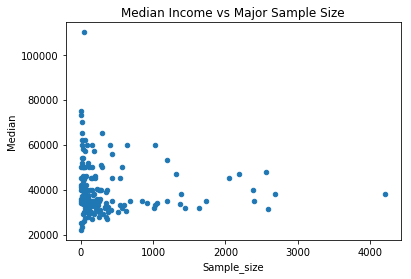

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
recent_grads.plot(x='Sample_size', y='Median', kind='scatter')
plt.title('Median Income vs Major Sample Size')

It seems that the least popular majors have both higher median incomes and lower ones than more popular majors. In any case, it can be seen that if you want to make more money, you should go into one of these less popular majors - only, the right one!
## Visualizing Unemployment vs major popularity

Text(0.5, 1.0, 'Unemployment rate vs Major Sample Size')

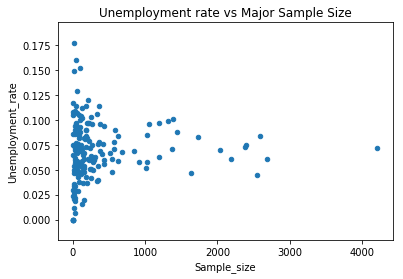

In [11]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')
plt.title('Unemployment rate vs Major Sample Size')

Just like for the earnings, it seems that less popular majors come with more variation. Again, if you want lower unemployment, pick one of these, but it has to be the right one!
## Visualizing Earnings vs full time employees

Text(0.5, 1.0, 'Median Income vs Full Time Employees')

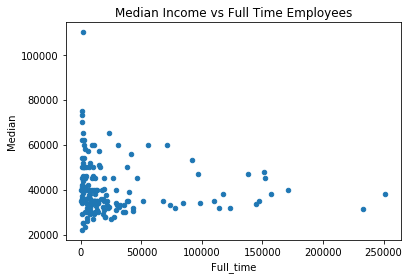

In [12]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter')
plt.title('Median Income vs Full Time Employees')

It seems the majors with the fewest workers can also earn the most, but also much less. The same trend seen above continues, less popular or populated majors are the ones were the highest and lowest benefits can be found.
## Visualizing gender distribution and unemployment rate
Let's now explore the relationship between the gender distribution of each major and its unemployment rate.

Text(0.5, 1.0, 'Unemployment rate vs Percentage of Women majors')

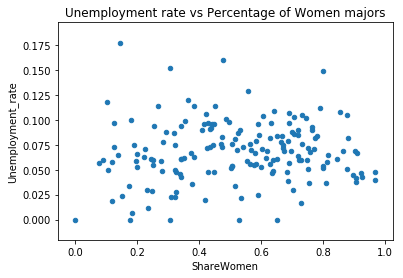

In [14]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')
plt.title('Unemployment rate vs Percentage of Women majors')

There seems to be a very slight correlation between higher share of women and higher unemployment rate.
## Visualizing Income and gender counts
Let's see if we can find a relationship between the earned income and number of women and men working in each major.

(0, 320000)

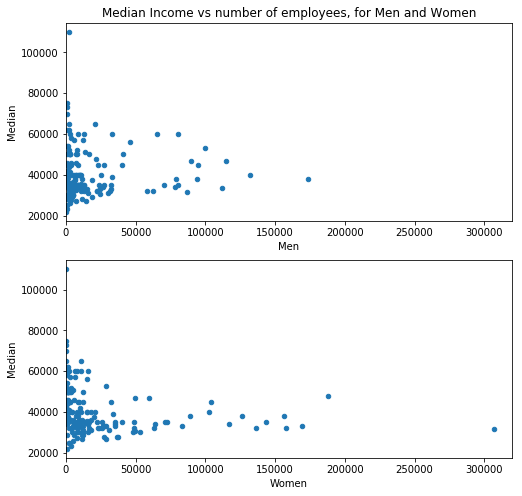

In [32]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(2,1,1)
plt.title('Median Income vs number of employees, for Men and Women')
recent_grads.plot(x='Men', y='Median', kind='scatter', ax=ax1)
ax1.set_xlim([0, 320000])
ax2 = fig.add_subplot(2,1,2)
recent_grads.plot(x='Women', y='Median', kind='scatter', ax=ax2)
ax2.set_xlim([0, 320000])


There are both majors with low number of women and high incomes, and majors with low number of men and high incomes. It seems that for majors with a certain number of women, majors with the same number of men earn slightly more.
## Visualizing distribution of the data
Let's move on to identify the most common values accross majors for multiple columns.

Text(0, 0.5, 'Number of Majors')

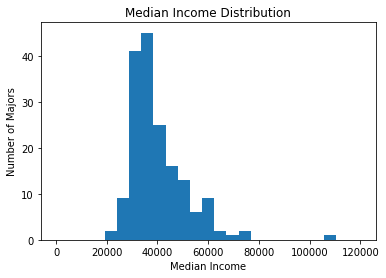

In [38]:
recent_grads['Median'].hist(bins=25, range=(0,120000))
plt.title('Median Income Distribution')
plt.grid(b=None)
plt.xlabel('Median Income')
plt.ylabel('Number of Majors')

It seems the most common median income is around 40k

Text(0, 0.5, 'Number of Majors')

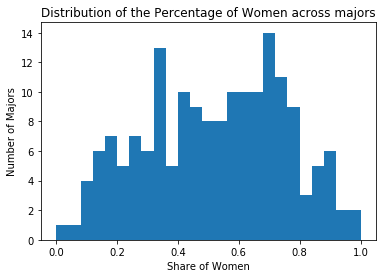

In [40]:
recent_grads['ShareWomen'].hist(bins=25, range=(0,1))
plt.title('Distribution of the Percentage of Women across majors')
plt.grid(b=None)
plt.xlabel('Share of Women')
plt.ylabel('Number of Majors')

It seems that the majority of majors have a majority of women. Let's verify this quickly:

In [44]:
print(len(recent_grads), len(recent_grads[recent_grads['ShareWomen'] < .5]), len(recent_grads[recent_grads['ShareWomen'] >= .5]))

172 76 96


It's true!
## Visualizing Income and Major Popularity in scatter matrix form
Let's see if we can get better insights into these relationships by using scatter matrices.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000210350363C8>,
      dtype=object)

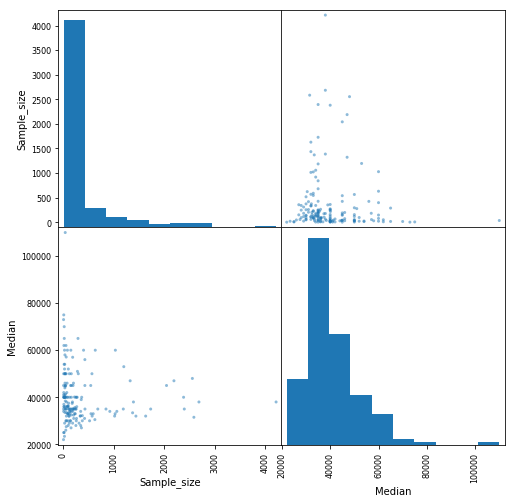

In [49]:
from pandas.plotting import scatter_matrix
fig2 = plt.figure(figsize=(8,8))
ax=fig2.subplots()
scatter_matrix(recent_grads[['Sample_size', 'Median']], ax=ax)

Observations:
* Most majors have small sample sizes
* These "unpopular" majors have a large variation in median income
* The median income is around 40k
* The majors with this median income have very different popularity

In conclusion, there is no correlation between popularity and income! Yet, if one wants higher income, it will be found in less popular majors, but the same can be said for lower income.
## Visualizing Income, Unemployment, and Major Popularity in scatter matrix form
Let's push the combined analysis even further.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021035245CF8>,
      dtype=object)

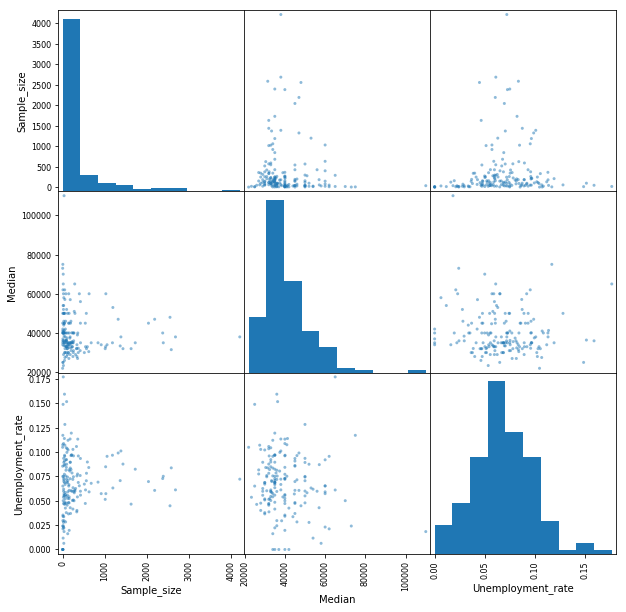

In [50]:
fig3 = plt.figure(figsize=(10,10))
ax=fig3.subplots()
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], ax=ax)

Additional Observations:
* The most common unemployment rate is around 6%
* The majors with this unemployment rate span the range of popularity
* The majors with this unemployment rate are around the average median income

## Visualizing highest and lowest earning majors gender distribution
The data is already ranked by median income, let's see how the top10 and bottom10 fare in terms of share of women

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

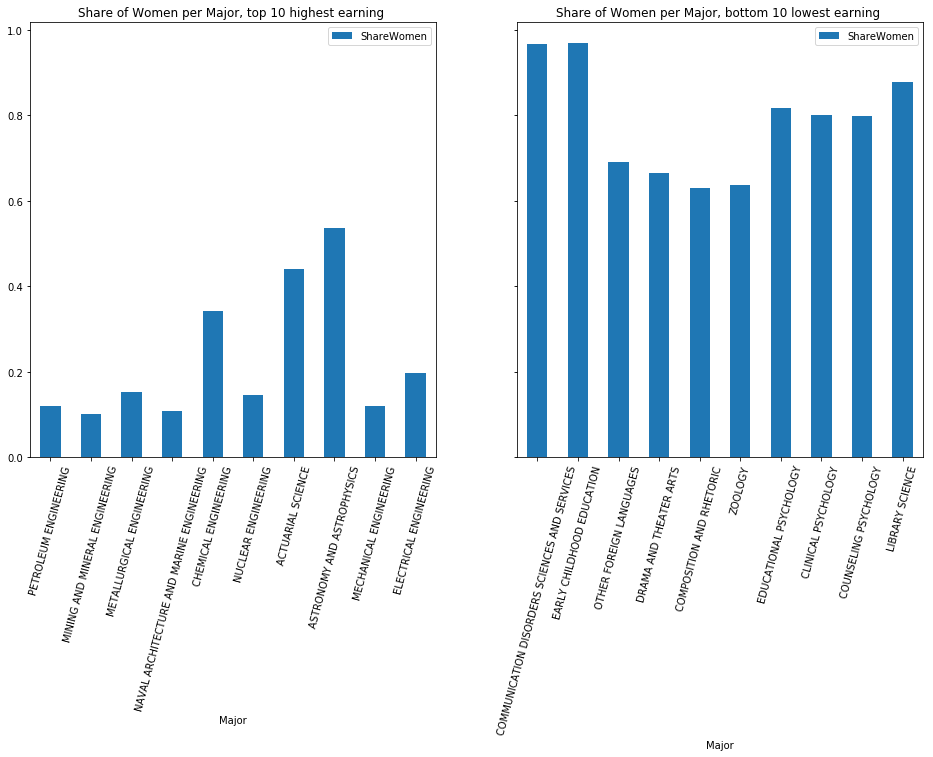

In [65]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1,2,1)
plt.title('Share of Women per Major, top 10 highest earning ')
recent_grads[:10].plot.bar(x='Major', y='ShareWomen', ax=ax1)
plt.xticks(rotation=75)


ax2 = fig.add_subplot(1,2,2, sharey=ax1)
plt.title('Share of Women per Major, bottom 10 lowest earning ')
recent_grads[-10:].plot.bar(x='Major', y='ShareWomen', ax=ax2)
plt.xticks(rotation=75)



Clearly, women are a minority in most highest income majors, with the exception of astronomy and astrophysics, and a majority in every lowest income major.
## Visualizing highest and lowest earning majors unemployment rates

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

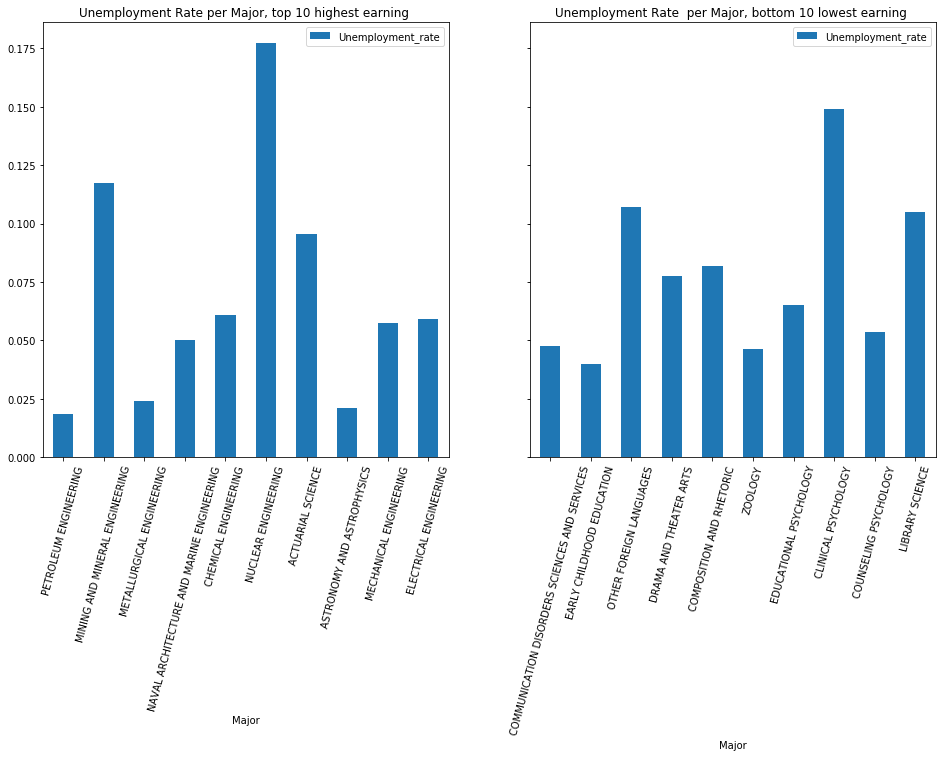

In [66]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1,2,1)
plt.title('Unemployment Rate per Major, top 10 highest earning ')
recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate', ax=ax1)
plt.xticks(rotation=75)


ax2 = fig.add_subplot(1,2,2, sharey=ax1)
plt.title('Unemployment Rate  per Major, bottom 10 lowest earning ')
recent_grads[-10:].plot.bar(x='Major', y='Unemployment_rate', ax=ax2)
plt.xticks(rotation=75)


The unemployment rate for some of the highest income majors is actually quite significant, and can be on occasion even higher than most of the lowest income majors!
## Analyzing outcomes for Aerospace Engineering
Let's see how the author's major sits compared to others...

In [80]:
aero_df = recent_grads[recent_grads['Major'].str.contains('AEROSPACE')]
aero_df

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
11,12,2401,AEROSPACE ENGINEERING,15058.0,12953.0,2105.0,Engineering,0.139793,147,11391,...,2724,8790,794,0.065162,60000,42000,70000,8184,2425,372


([], <a list of 0 Text xticklabel objects>)

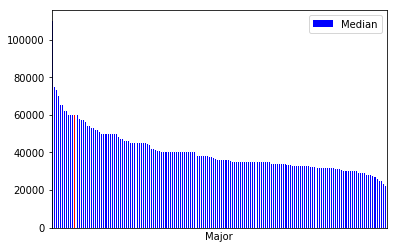

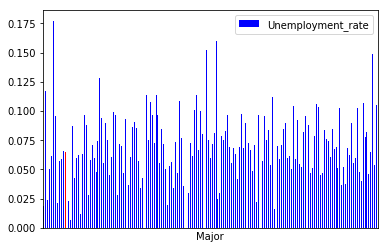

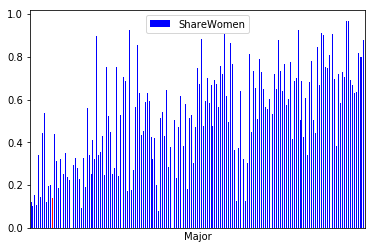

In [106]:
import numpy as np
colors = list(np.where(recent_grads["Major"]=='AEROSPACE ENGINEERING', 'red', 'blue'))
bar_list = recent_grads.plot.bar(x='Major', y='Median', colors=colors)
plt.xticks([])
bar_list = recent_grads.plot.bar(x='Major', y='Unemployment_rate', colors=colors)
plt.xticks([])
bar_list = recent_grads.plot.bar(x='Major', y='ShareWomen', colors=colors)
plt.xticks([])

It seems AE is highly competitive in terms of median income, unemployment rate, but not so much in terms of share of women.
## Conclusion
Once again, pandas makes the work of cleaning, analyzing, and visualizing data extremely easy!